In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as c
import csv

In [5]:
cd "~\Google Drive\MAGPIE\data\2015\s0611_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0611_15


In [19]:
x_pos=[]
n_e=[]
Z=[]
T_e=[]
T_e_err=[]
T_i=[]
T_i_err=[]
V=[]
V_err=[]

filename='s0611_15 TS fits v3.dat'
with open(filename, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    next(reader)
    for row in reader:
        x_pos.append(float(row[3]))
        n_e.append(float(row[5]))
        Z.append(float(row[6]))
        T_e.append(float(row[7]))
        T_i.append(float(row[9]))
        V.append(float(row[11]))
        
x_pos=np.array(x_pos)*1e-3#m
n_e=np.array(n_e)*1e6#m^-3
Z=np.array(Z)
T_e=np.array(T_e)
T_i=np.array(T_i)
V=np.array(V)*1e3#m/s


In [89]:
def Harris_B(x, x0, B0, L,C):
    return B0*np.tanh((x-x0)/L)+C

def Harris_j(x, x0, B0, L):
    return -B0/(c.mu_0*L*(np.cosh((x-x0)/L))**2)
B0=2.84
L=0.52e-3
C=0
x0=0
x=x_pos#np.linspace(-2e-3,2e-3,1000)
B=Harris_B(x,x0,B0,L,C)
j=-Harris_j(x,x0,B0,L)

In [78]:
E0=-V[-1]*B[-1]

In [62]:
def col_log_eis(T_e,n_e,Z):
    if T_e<10*Z**2: #see NRL formulary pg 34
        col_log=23-np.log((n_e*1e-6)**0.5*Z*T_e**-1.5)
    else:
        col_log=24-np.log((n_e*1e-6)**0.5*T_e**-1.0)
    return col_log
col_log_ei=np.vectorize(col_log_eis)

eta=1.03e-2*Z*col_log_ei(T_e,n_e,Z)*T_e**-1.5 #ohm cm
eta=eta*1e-2#ohm m

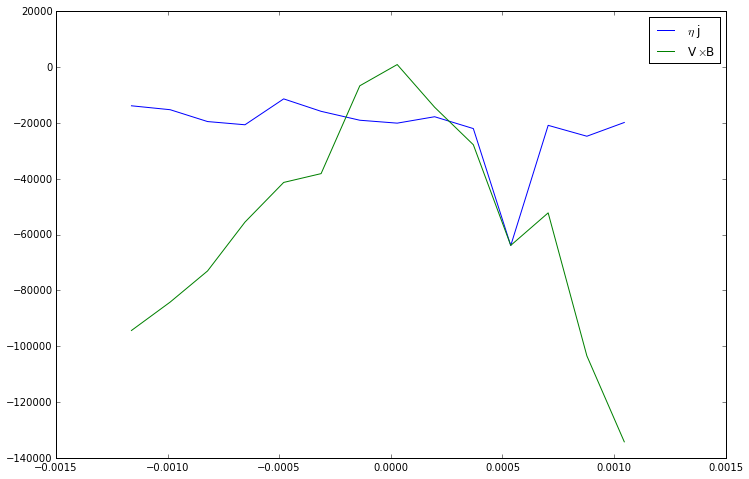

In [72]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(x, eta*j, label=r'$\eta$ j')
ax.plot(x, V*B, label=r'V$\times$B')
ax.legend()

In [90]:
eta_eff=((E0+V*B)/j)/eta

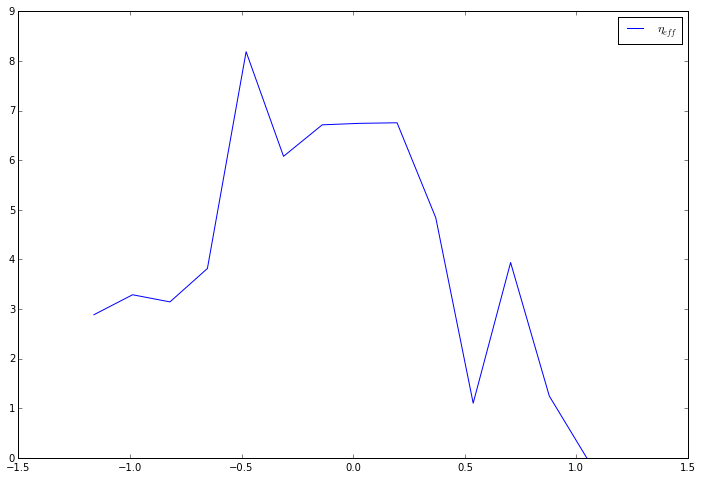

In [91]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(x*1e3, eta_eff, label=r'$\eta_{eff}$')
ax.legend()

In [76]:
E0=-50000*B0

In [82]:
V*B

array([ -94371.40130547,  -84193.5081625 ,  -73028.31132601,
        -55521.2933478 ,  -41301.568929  ,  -38143.99585508,
         -6661.72749357,     946.11356141,  -14350.26442208,
        -27789.78968681,  -63864.00646187,  -52214.76242676,
       -103461.06239621, -134270.75575619])